<a href="https://colab.research.google.com/github/KaziShahHamza/Colab-Codes/blob/main/iris2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# File path in Google Drive (update if your path is different)
file_path = "/content/drive/MyDrive/Datasets/iris.data"

# Iris dataset has no column names, so we add them manually
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load dataset
iris = pd.read_csv(file_path, header=None, names=columns)

# Show first 10 rows
print(iris.head(100))


    sepal_length  sepal_width  petal_length  petal_width          species
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


In [ ]:
# Shape of dataset
print("Shape:", iris.shape)

# Column names
print("Columns:", iris.columns)

# Summary statistics
print(iris.describe())

# Check if any missing values
print("Missing values:", iris.isnull().sum())


Shape: (150, 5)
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Missing values: sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features (X) and Target (y)
X = iris.drop("species", axis=1)
y = iris["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
# Example prediction: sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2
sample = [[5.1, 3.5, 1.4, 0.2]]
print("Predicted species:", model.predict(sample)[0])


Predicted species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


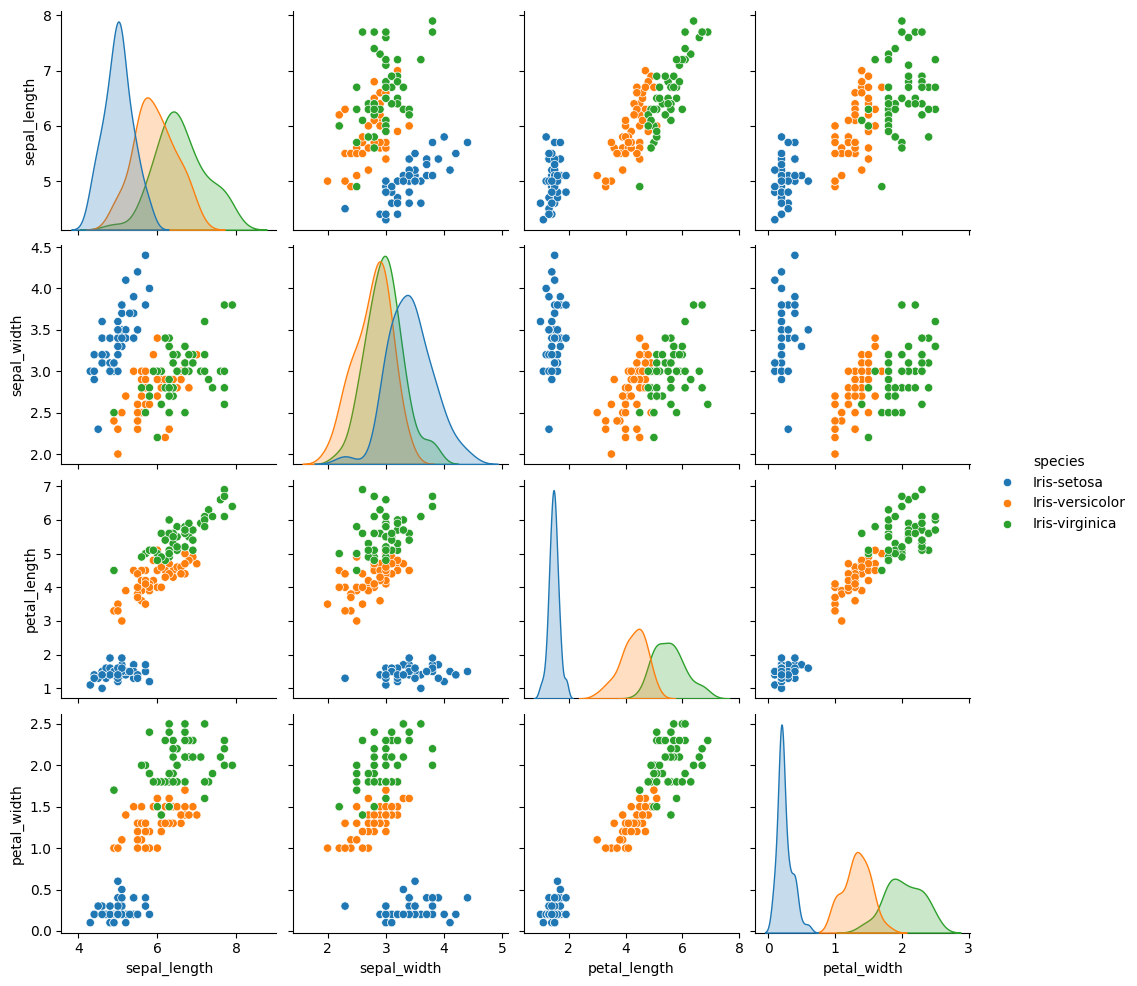

In [ ]:
sns.pairplot(iris, hue="species", diag_kind="kde")
plt.show()


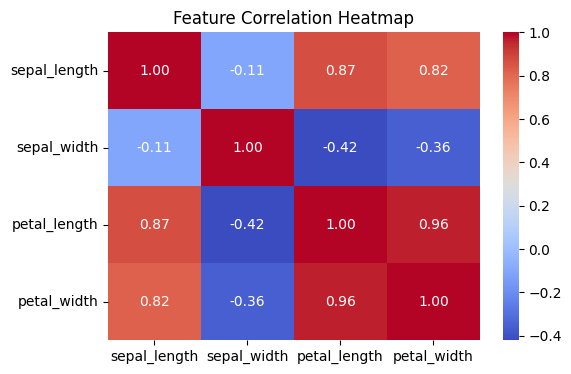

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

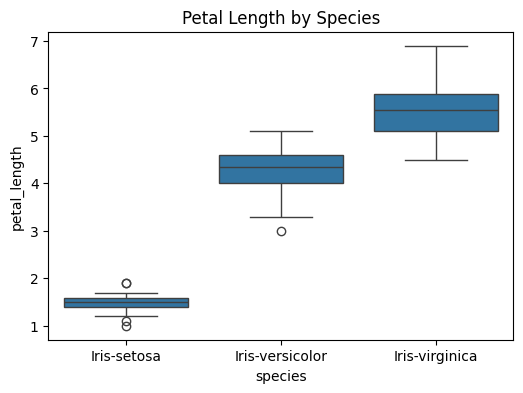

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="species", y="petal_length", data=iris)
plt.title("Petal Length by Species")
plt.show()


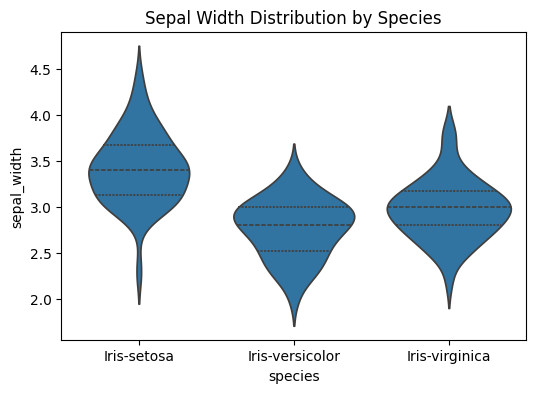

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(x="species", y="sepal_width", data=iris, inner="quartile")
plt.title("Sepal Width Distribution by Species")
plt.show()


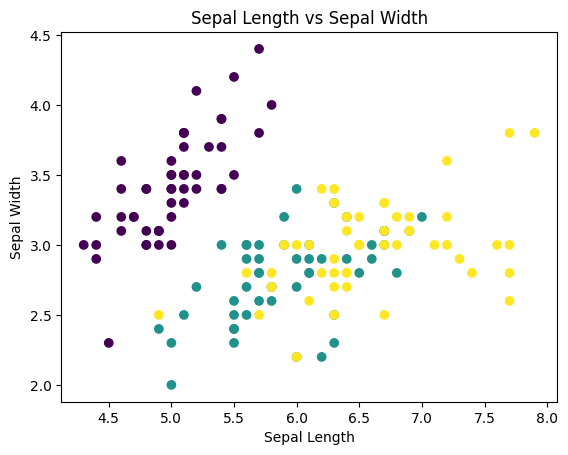

In [ ]:
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["species"].astype("category").cat.codes, cmap="viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()
